<a href="https://colab.research.google.com/github/paulo-santos-ds/Projects/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução


O Machine Learning é uma técnica importante no campo da saúde e pode ser aplicado para ajudar no diagnóstico e tratamento de doenças, incluindo a diabetes.
Existem várias abordagens de Machine Learning que podem ser utilizadas no diagnóstico e prevenção da diabetes, como a classificação, regressão e clustering.
Na classificação, um modelo de Machine Learning é treinado para identificar se um paciente tem diabetes ou não, com base em um conjunto de dados que inclui informações como idade, peso, níveis de açúcar no sangue, histórico familiar e outros fatores relevantes. Alguns algoritmos de classificação que podem ser utilizados incluem árvores de decisão, regressão logística e redes neurais.
Na regressão, o modelo é treinado para prever um resultado numérico, como o nível de açúcar no sangue de um paciente com diabetes. Isso pode ajudar os profissionais de saúde a determinar o tratamento adequado e monitorar o progresso do paciente. Alguns algoritmos de regressão que podem ser utilizados incluem regressão linear, regressão polinomial e árvores de decisão de regressão.
Na técnica de clustering, os pacientes são agrupados com base em suas características e histórico médico, permitindo aos profissionais de saúde identificar padrões e tendências em grandes conjuntos de dados. Alguns algoritmos de clustering que podem ser utilizados incluem k-means e clustering hierárquico.
Em resumo, o Machine Learning pode ser uma ferramenta valiosa no diagnóstico, tratamento e prevenção da diabetes. Utilizando técnicas de classificação, regressão e clustering, os profissionais de saúde podem fazer previsões precisas e fornecer tratamentos personalizados, melhorando a qualidade de vida dos pacientes com diabetes.



In [ ]:
!pip install kaggle; #caso seja necessário atualizar a biblioteca no google colab

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar a competição e copiar o endereço da API para o download do dataset

!kaggle datasets download -d mathchi/diabetes-data-set
#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 5.94MB/s]
Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Descrição do nome das colunas

1	- Pregnancies: Número de vezes que engravidou    
2	- Glucose: Concentração de plasma de glicose após duas horas  
3	- BloodPressure: Pressão arterial diastólica em (mm Hg)   
4	- SkinThickness: Espessura da dobra da pele do tríplice em (mm)   
5	- Insulin: Insulina sérica de 2 horas (mu U/ml)   
6	- BMI: Indice de massa corporal peso/(altura²)   
7	- DiabetesPedigreeFunction: Função de diabetes  
8	- Age: Idade (anos)  
9	- Outcome: (1 – tem diabetes) (0 - não tem diabetes)  


In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Descrição atributos da pagina

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Verificação de tipos de dados

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Observando se existe dados duplicados

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
df.duplicated().sum()

0

# Estatistica do dataset concetração dos dados

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Correlação dos dados

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


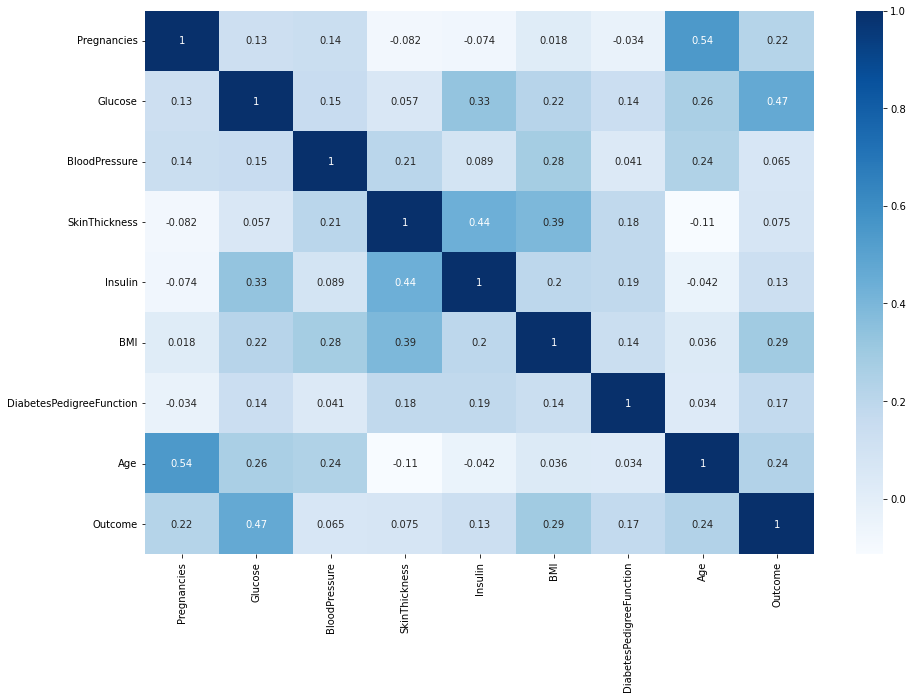

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot =True, cmap = 'Blues')

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
for c in df.columns:
  print(f"{c}: {df[c].nunique()}")

Pregnancies: 17
Glucose: 136
BloodPressure: 47
SkinThickness: 51
Insulin: 186
BMI: 248
DiabetesPedigreeFunction: 517
Age: 52
Outcome: 2


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1080 with 0 Axes>

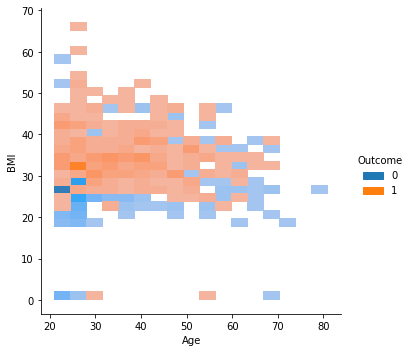

In [ ]:
plt.figure(figsize=(20, 15))
sns.displot(x='Age', y='BMI', data=df, hue='Outcome')
plt.show

In [ ]:
categorias= ["Glucose", "BMI", "DiabetesPedigreeFunction"]


1 : Glucose
2 : BMI
3 : DiabetesPedigreeFunction


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1080 with 0 Axes>

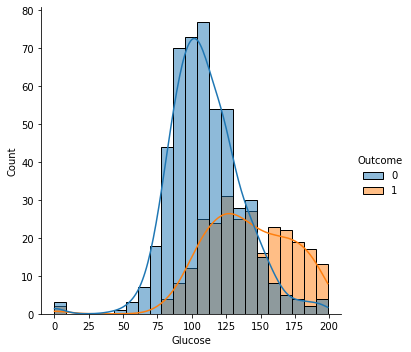

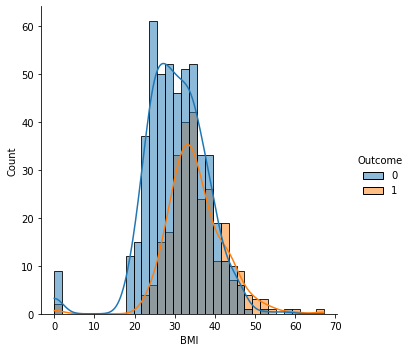

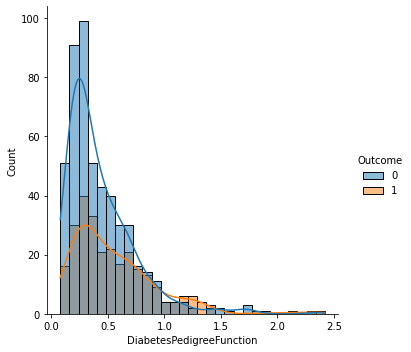

In [ ]:
cont = 0
plt.figure(figsize = [20, 15])
for i in categorias:
    cont += 1
    print(cont, ':', i)
    sns.displot(data = df, kde=True, x = df[str(i)], hue='Outcome')
plt.plot()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

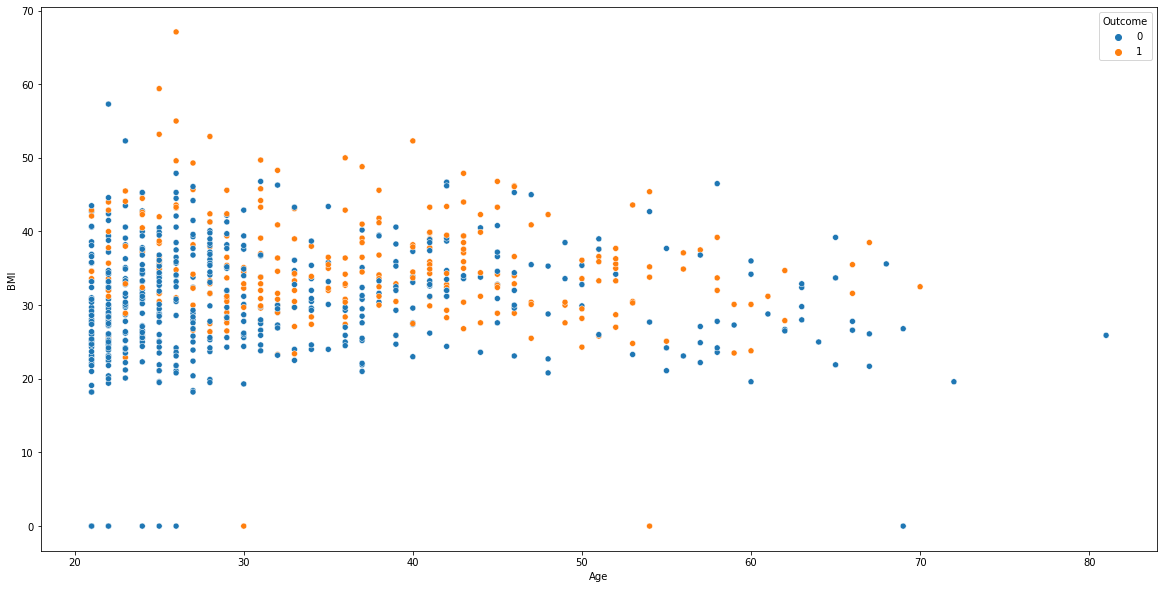

In [ ]:
#comparação idade e IMC ("bmi")
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Age', y='BMI', data=df, hue='Outcome', sizes='Glucose')
plt.show

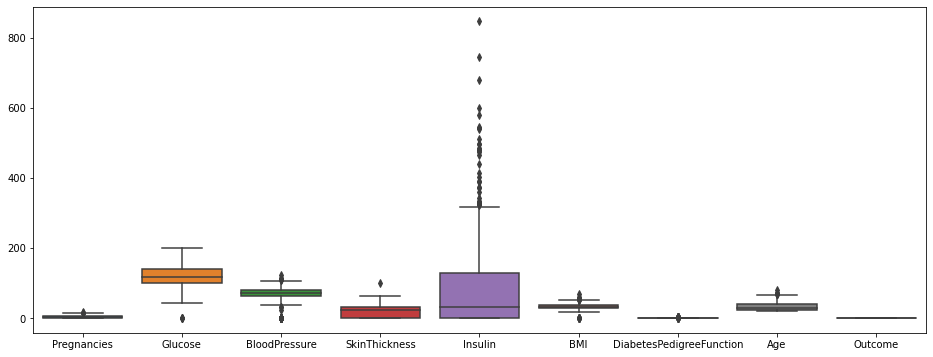

In [ ]:
#Remoção de outlaiers
plt.figure(figsize=(16,6))
sns.boxplot(data = df)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df["Insulin"].quantile(0.95)

293.0

In [ ]:
df2 = df[df["Insulin"] < df["Insulin"].quantile(0.95)]

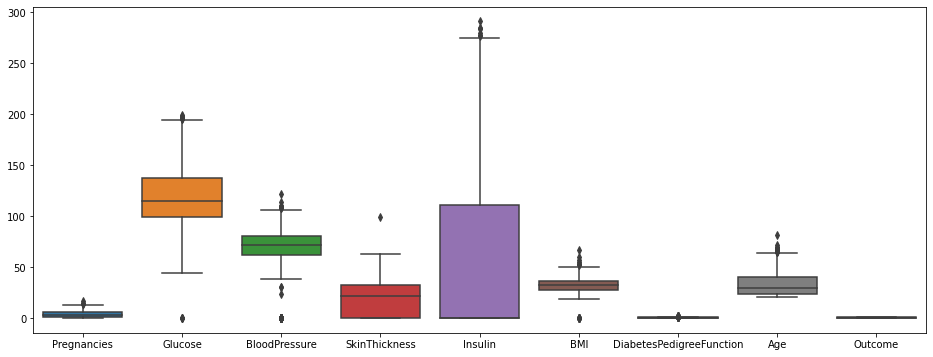

In [ ]:
#Remoção de outlaiers
plt.figure(figsize=(16,6))
sns.boxplot(data = df2)

In [ ]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.839286,118.815934,68.935440,19.888736,60.344780,31.814973,0.465835,33.181319,0.336538
std,3.388263,31.088801,19.664307,15.968762,76.360944,7.932397,0.320937,11.707113,0.472850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.075000,0.242500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.367000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,110.500000,36.325000,0.613250,40.250000,1.000000
max,17.000000,199.000000,122.000000,99.000000,291.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df3 = df2[df2["SkinThickness"] < df2["SkinThickness"].quantile(0.98)]

In [ ]:
df3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,3.855134,118.638537,68.720113,19.052039,59.182841,31.592124,0.460201,33.136428,0.334740
std,3.370560,31.041819,19.814183,15.091975,75.899806,7.817324,0.312047,11.668772,0.472232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,98.500000,62.000000,0.000000,0.000000,26.800000,0.240500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,21.000000,0.000000,31.600000,0.364000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,110.000000,35.900000,0.606000,40.000000,1.000000
max,17.000000,199.000000,122.000000,47.000000,291.000000,67.100000,2.288000,81.000000,1.000000


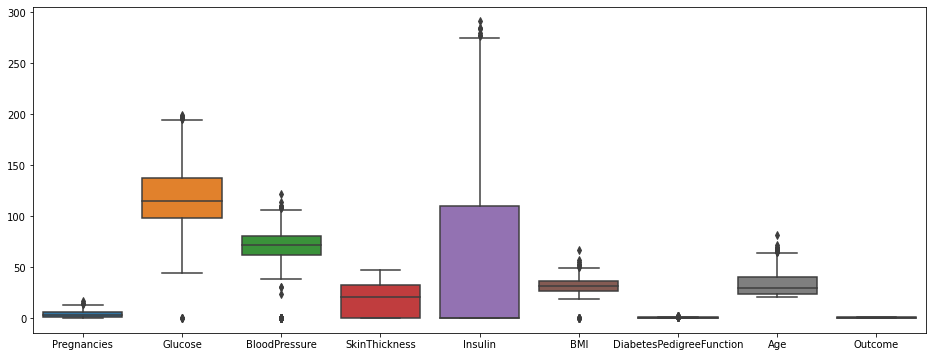

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data = df3)


In [ ]:
df3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,3.855134,118.638537,68.720113,19.052039,59.182841,31.592124,0.460201,33.136428,0.334740
std,3.370560,31.041819,19.814183,15.091975,75.899806,7.817324,0.312047,11.668772,0.472232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,98.500000,62.000000,0.000000,0.000000,26.800000,0.240500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,21.000000,0.000000,31.600000,0.364000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,110.000000,35.900000,0.606000,40.000000,1.000000
max,17.000000,199.000000,122.000000,47.000000,291.000000,67.100000,2.288000,81.000000,1.000000


In [ ]:
df3['BloodPressure'].quantile(0.06)

44.0

In [ ]:
df4 = df3[df3["BloodPressure"]> df3["BloodPressure"].quantile(0.06)]

In [ ]:
df4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,3.893553,118.832084,72.746627,19.851574,61.914543,31.870015,0.461832,33.340330,0.329835
std,3.366823,31.372440,11.844601,14.867498,76.856210,7.096472,0.307709,11.795794,0.470506
min,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,98.500000,64.000000,0.000000,0.000000,27.100000,0.244500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.366000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,35.900000,0.609500,41.000000,1.000000
max,17.000000,199.000000,122.000000,47.000000,291.000000,67.100000,1.893000,81.000000,1.000000


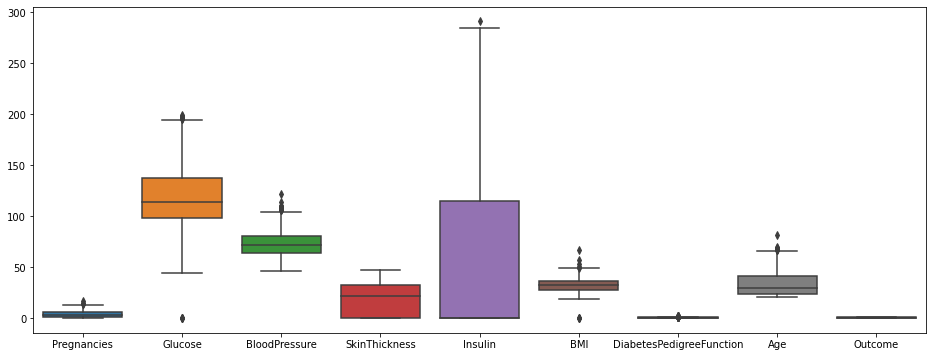

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data = df4)


In [ ]:
df4['Glucose'].quantile(0.06)

80.0

In [ ]:
df5 = df4[df4["Glucose"]> df4["Glucose"].quantile(0.06)]

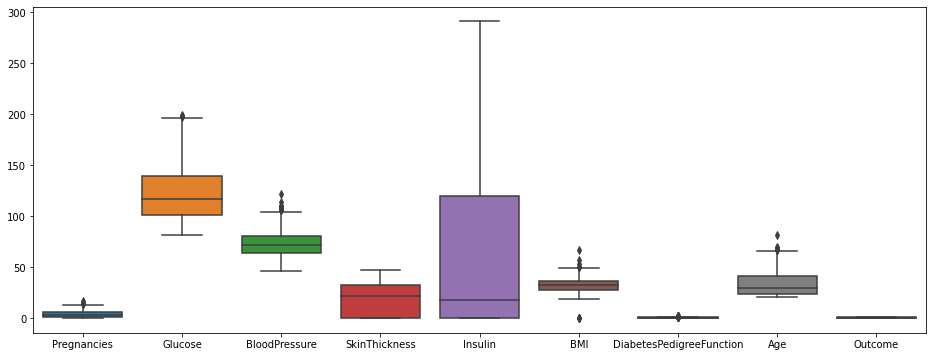

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data = df5)

In [ ]:
X = df5.drop("Outcome",axis= 1)
y = df5["Outcome"]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 624, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
490,2,83,65,28,66,36.8,0.629,24
406,4,115,72,0,0,28.9,0.376,46
10,4,110,92,0,0,37.6,0.191,30
135,2,125,60,20,140,33.8,0.088,31
147,2,106,64,35,119,30.5,1.400,34
...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40
137,0,93,60,25,92,28.7,0.532,22
335,0,165,76,43,255,47.9,0.259,26
542,10,90,85,32,0,34.9,0.825,56


In [ ]:
y_train

490    0
406    1
10     0
135    0
147    0
      ..
95     0
137    0
335    0
542    1
133    0
Name: Outcome, Length: 499, dtype: int64

In [ ]:
log = LogisticRegression(max_iter=1000)

In [ ]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
log.score(X_train,y_train)

0.7695390781563126

In [ ]:
log.score(X_test,y_test)

0.784

In [ ]:
y_previsto = log.predict(X_test)
y_previsto

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_previsto)

0.784

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        81
           1       0.79      0.52      0.63        44

    accuracy                           0.78       125
   macro avg       0.79      0.72      0.74       125
weighted avg       0.79      0.78      0.77       125



In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_previsto)

array([[75,  6],
       [21, 23]])

#Conclusão

A diabetes é uma doença crônica que afeta milhões de pessoas em todo o mundo. A aplicação do Machine Learning no diagnóstico, tratamento e prevenção da diabetes pode ser muito útil para melhorar a qualidade de vida dos pacientes. Com técnicas de classificação, regressão e clustering, é possível identificar padrões e tendências nos dados de saúde dos pacientes e fornecer tratamentos personalizados, baseados em suas necessidades individuais. É importante ressaltar que a aplicação do Machine Learning na saúde deve ser feita em conjunto com profissionais médicos qualificados, para garantir que as decisões tomadas sejam seguras e precisas.

Para mais informação segue meu linkedin: https://www.linkedin.com/in/paulo-roberto-data-science/